This script is for the statistical data analysis for the article "Classification and biomarker identification of prostate tissue from TRAMP mice with hyperpolarized 13C-SIRA" by A. Frahm et al. Talanta. 2021 Aug 20:122812.

All code is written by A Frahm (annetirsdag@gmail.com).

Versions used:

Python: 3.6.10 Scipy: 1.5.2 sklearn: 0.23.2


In [1]:
%run "Code for Frahm et al. 2021 - Functions.ipynb"

In [2]:
#load dDNP data
#metabolite selected dataset
data_met = pd.read_excel("data_met_final.xlsx", index_col= 0)
#peak picked dataset
data_peak = pd.read_excel("data_peak_final.xlsx", index_col= 0)

#meta data
md = pd.read_excel("md_final.xlsx", index_col= 0)

#peak data
#remove ref
ref_peak = data_peak[25.41]
data_peak.drop(25.41, axis = 1,  inplace = True)

#normalize data
data_peak = data_peak.divide(ref_peak, axis = 0) #to ref.
data_peak = data_peak.divide(md['New "weight"'], axis = 0) #to weight of dDNP sample

#met data
#remove ref
ref_met = data_met[25.4]
data_met.drop(25.4, axis = 1,  inplace = True)

#normalize data
data_met = data_met.divide(ref_met, axis = 0)
data_met = data_met.divide(md['New "weight"'], axis = 0)

Set every value below zero to be zero

In [3]:
data_met_zero = data_met.where(data_met>0,0)
data_peak_zero = data_peak.where(data_peak>0,0)

Make PCA

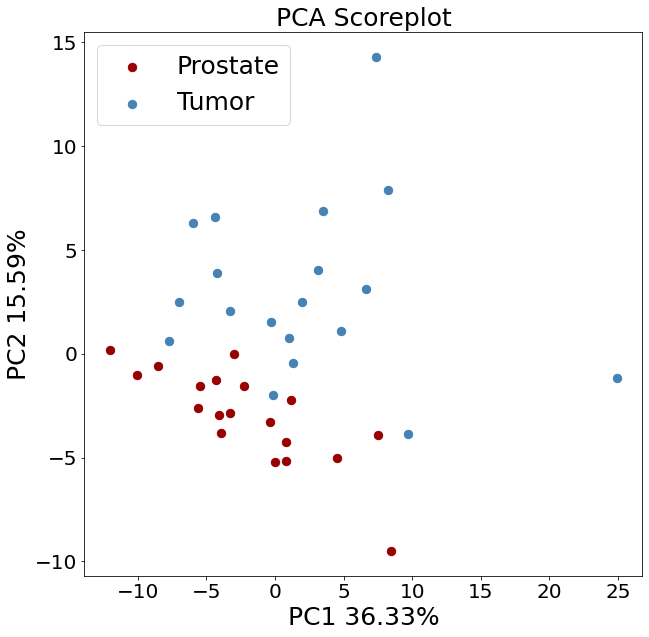

[36.33 15.59  9.36  7.21  5.74  5.4   2.7   2.31  2.17  1.7   1.45  1.26
  1.19  1.    0.89  0.65  0.64  0.55  0.51  0.44  0.38  0.33  0.29  0.29
  0.25  0.23  0.2   0.16  0.14  0.13  0.11  0.1   0.09  0.07  0.05  0.04
  0.04  0.  ]


In [4]:
makepca(data_peak_zero, md['Tissue'], 's')

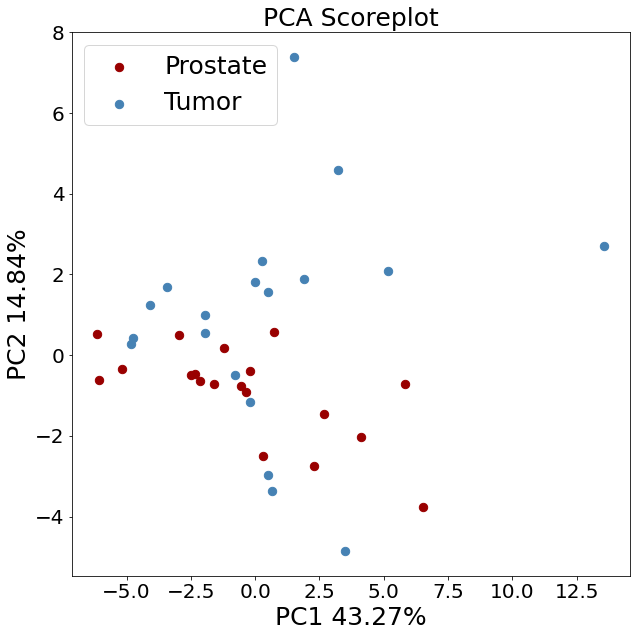

[43.27 14.84 10.36  8.6   5.98  3.57  2.71  1.89  1.55  1.41  1.3   0.96
  0.75  0.56  0.49  0.34  0.31  0.24  0.15  0.14  0.11  0.11  0.08  0.06
  0.06  0.05  0.03  0.03  0.02  0.01  0.01  0.    0.    0.    0.  ]


In [5]:
makepca(data_met_zero, md['Tissue'], 's')

Make Random Forest feature analysis (Takes a long time to run)

Out-of-bag score (%): 86.8421052631579


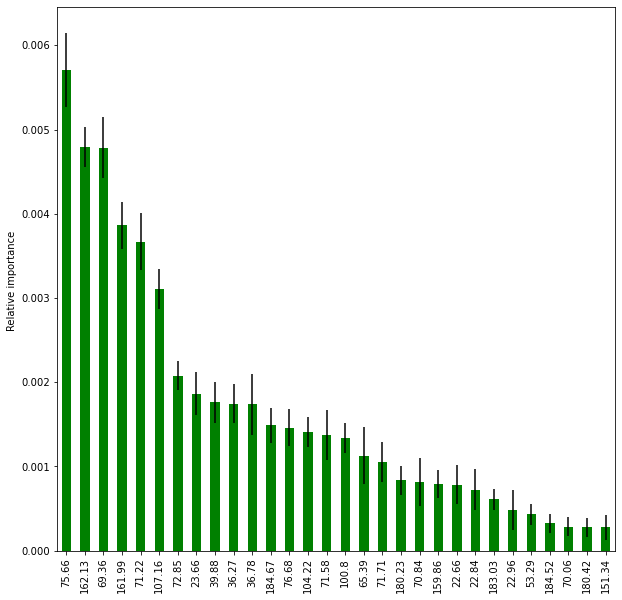

In [6]:
imp_chart_peak_zero = makerf(data_peak_zero, md["Tissue"])

Out-of-bag score (%): 78.94736842105263


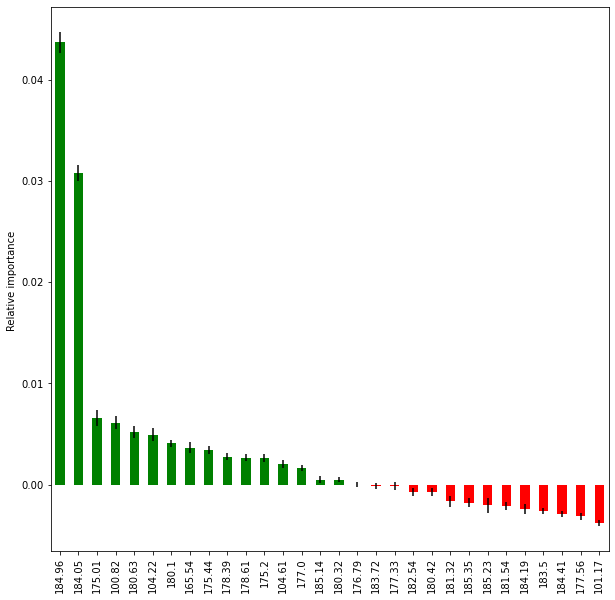

In [7]:
imp_chart_met_zero = makerf(data_met_zero, md["Tissue"])

Save generated DataFrames with RF results

In [8]:
pickle.dump(imp_chart_peak_zero, open("imp_chart_peak_zero.p","wb"))
pickle.dump(imp_chart_met_zero, open("imp_chart_met_zero.p","wb"))

In [5]:
#imp_chart_peak_zero = pickle.load(open('imp_chart_peak_zero.p', 'rb'))
#imp_chart_met_zero = pickle.load(open('imp_chart_met_zero.p', 'rb'))

In [9]:
imp_chart_peak_zero 

,Mean,std err.,color
75.66,0.005707,0.000440,g
162.13,0.004790,0.000239,g
69.36,0.004781,0.000362,g
161.99,0.003863,0.000281,g
71.22,0.003669,0.000337,g
...,...,...,...
75.33,-0.001173,0.000290,r
185.23,-0.001294,0.000208,r
183.84,-0.001346,0.000163,r
76.91,-0.001473,0.000239,r


In [10]:
imp_chart_met_zero

,Mean,std err.,color
184.96,0.043711,0.001034,g
184.05,0.030793,0.000828,g
175.01,0.006554,0.000778,g
100.82,0.006119,0.000623,g
180.63,0.005170,0.000593,g
104.22,0.004927,0.000621,g
180.10,0.004080,0.000377,g
165.54,0.003669,0.000533,g
175.44,0.003451,0.000412,g
178.39,0.002758,0.000359,g


Get list of important features and make plots

In [11]:
imp_peak = imp_clean(imp_chart_peak_zero)
imp_met = imp_clean(imp_chart_met_zero)

In [12]:
imp_peak, imp_met

(array([ 75.66, 162.13,  69.36, 161.99,  71.22, 107.16,  72.85,  23.66,
         39.88,  36.27,  36.78, 184.67,  76.68, 104.22,  71.58, 100.8 ,
         65.39,  71.71, 180.23,  70.84, 159.86,  22.66,  22.84, 183.03,
         53.29]),
 array([184.96, 184.05, 175.01, 100.82, 180.63, 104.22, 180.1 , 165.54,
        175.44, 178.39, 178.61, 175.2 ]))

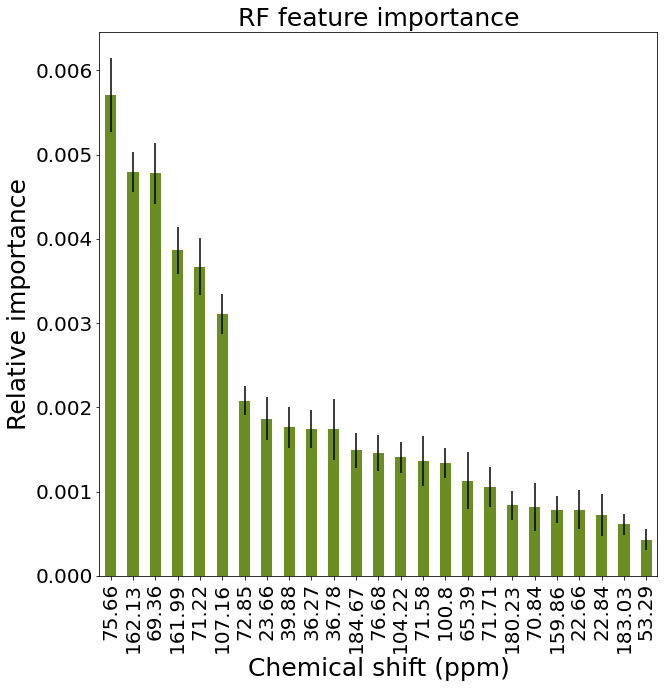

In [13]:
plot_rfs(imp_chart_peak_zero, imp_peak)

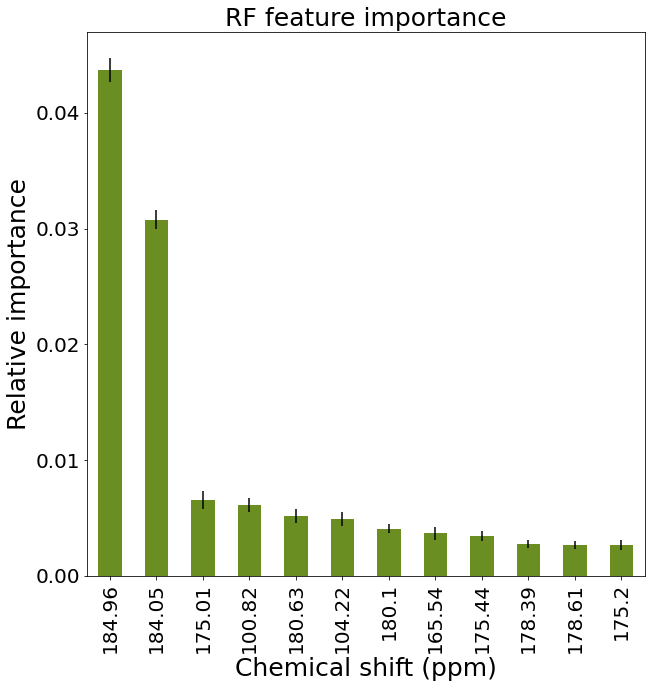

In [14]:
plot_rfs(imp_chart_met_zero, imp_met)

SVM classification applied to significant features found by RF

In [15]:
svm_met = svm_feats(data_met_zero, md['Tissue'], imp_met)
svm_peak = svm_feats(data_peak_zero, md['Tissue'], imp_peak)

Scaling method: Auto-scale
Scaling method: Auto-scale


In [16]:
svm_met

,score,params
1,0.815789,"{'C': 1.0, 'kernel': 'linear'}"
2,0.921053,"{'C': 0.25, 'kernel': 'linear'}"
3,0.894737,"{'C': 0.0625, 'kernel': 'linear'}"
4,0.921053,"{'C': 0.03125, 'kernel': 'linear'}"
5,0.921053,"{'C': 0.5, 'kernel': 'linear'}"
6,0.921053,"{'C': 1.0, 'kernel': 'linear'}"
7,0.921053,"{'C': 0.03125, 'kernel': 'linear'}"
8,0.921053,"{'C': 0.125, 'kernel': 'linear'}"
9,0.921053,"{'C': 0.125, 'kernel': 'linear'}"
10,0.921053,"{'C': 0.125, 'kernel': 'linear'}"


In [17]:
svm_peak

,score,params
1,0.842105,"{'C': 2.0, 'kernel': 'linear'}"
2,0.868421,"{'C': 2.0, 'kernel': 'linear'}"
3,0.868421,"{'C': 2.0, 'kernel': 'linear'}"
4,0.842105,"{'C': 0.03125, 'kernel': 'linear'}"
5,0.921053,"{'C': 16.0, 'kernel': 'linear'}"
6,0.947368,"{'C': 1.0, 'kernel': 'linear'}"
7,0.947368,"{'C': 0.125, 'kernel': 'linear'}"
8,0.947368,"{'C': 0.25, 'kernel': 'linear'}"
9,0.947368,"{'C': 0.125, 'kernel': 'linear'}"
10,0.947368,"{'C': 0.125, 'kernel': 'linear'}"


T-test of signals found important for the metabolite selected dataset

In [18]:
met_interest = data_met_zero[imp_met] #get data of only significant metabolites

In [19]:
tt = pd.DataFrame(columns= ["P-value", "Significance"])

for i in met_interest.columns:
    
    bob = met_interest[md.Tissue == "Prostate"][i]
    bub = met_interest[md.Tissue == "Tumor"][i]
    
    #Compare prostate and tumor samples
    t, p = stats.ttest_ind(bob, bub, equal_var= False)
    
    #Bonferoni corrected P-values
    if p < 0.01/12:
        tt.loc[i] = [p, "**"]
    elif p < 0.05/12:
        tt.loc[i] = [p, "*"]
    else:
        tt.loc[i] = [p, ""]
tt

,P-value,Significance
184.96,0.000025,**
184.05,0.000678,**
175.01,0.001289,*
100.82,0.042091,
180.63,0.155091,
104.22,0.029863,
180.10,0.194757,
165.54,0.099090,
175.44,0.033191,
178.39,0.091125,


Make boxplots comparing prostate and tumor sample values for the 12 important metabolites

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:391: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:225: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)


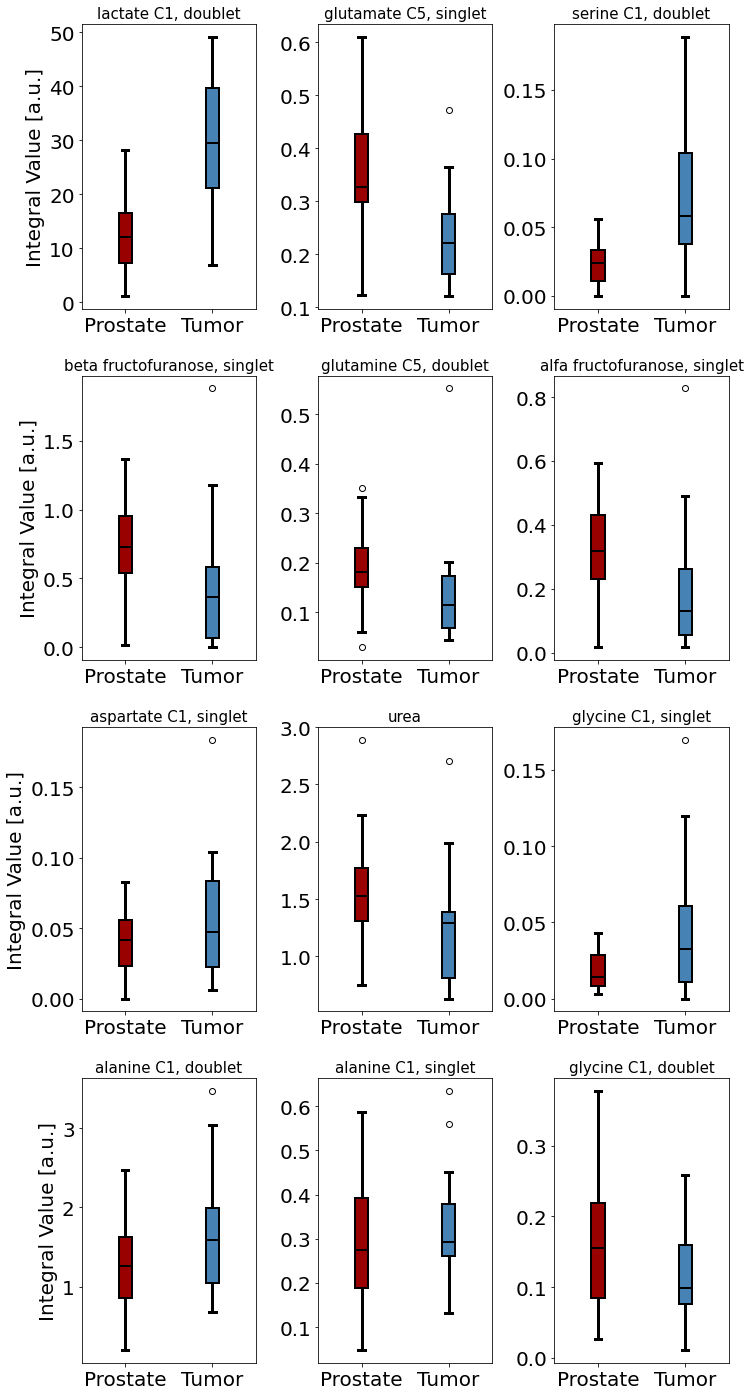

In [20]:
#dict translating the chemical shift values into metabolite names
name_met = dict(zip([184.96, 184.05, 100.82, 175.01, 104.22, 180.63, 180.1 , 175.44,
        175.2 , 165.54, 178.61, 178.39], ['lactate C1, doublet', 'glutamate C5, singlet',
       'beta fructofuranose, singlet', 'serine C1, doublet',
       'alfa fructofuranose, singlet', 'glutamine C5, doublet',
       'aspartate C1, singlet', 'glycine C1, singlet',
       'glycine C1, doublet', 'urea', 'alanine C1, singlet',
       'alanine C1, doublet']))

imps_met = [name_met[i] for i in imp_met]

df = met_interest.copy()

#df = df.astype('float64') #if no output try running this

df.columns = np.arange(12)

df = df.multiply(10000) #makes the arbitrary values nicer to look at

df['Tissue'] = md.Tissue[df.index].values #prostate or tumor

#sey up 3*4 grid of suplots
fig, axes = plt.subplots(nrows=4, ncols=3,sharey=False, constrained_layout=True, figsize = (10, 20))

#groups samples. Specifies appearance of boxplots
bp_dict = df.boxplot(
by="Tissue", ax=axes.flatten()[:12],
return_type='both',
patch_artist = True, fontsize = 20, grid = False,
    boxprops = dict(linestyle='-', linewidth=2, color='k'),
    medianprops = dict(linestyle='-', linewidth=2, color='k'),
    #flierprops=dict(linestyle='-', linewidth=2, color = 'k'),
    whiskerprops=dict(linestyle='-', linewidth=3, color = 'k'),
    capprops=dict(linestyle='-', linewidth=3)
)

plt.tight_layout() #no overlap between text
plt.suptitle('') #removes main title of plot

colors = "#990000","steelblue" #colors for tissue type
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_title(imps_met[row_key], fontsize = 15)
    if row_key in [0, 3, 6, 9]: #Name of y-axis on each row
        ax.set_ylabel('Integral Value [a.u.]', fontsize = 20)
    ax.set_xlabel('')
    #ax.xticks(fontsize = 20)
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

plt.show()

Box-plots of SNR-values for the 12 important metabolites

In [21]:
snr_12 = pd.read_excel("snr_12.xlsx", index_col= 0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:391: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\boxplot.py:225: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.15, top=0.9, left=0.1, right=0.9, wspace=0.2)


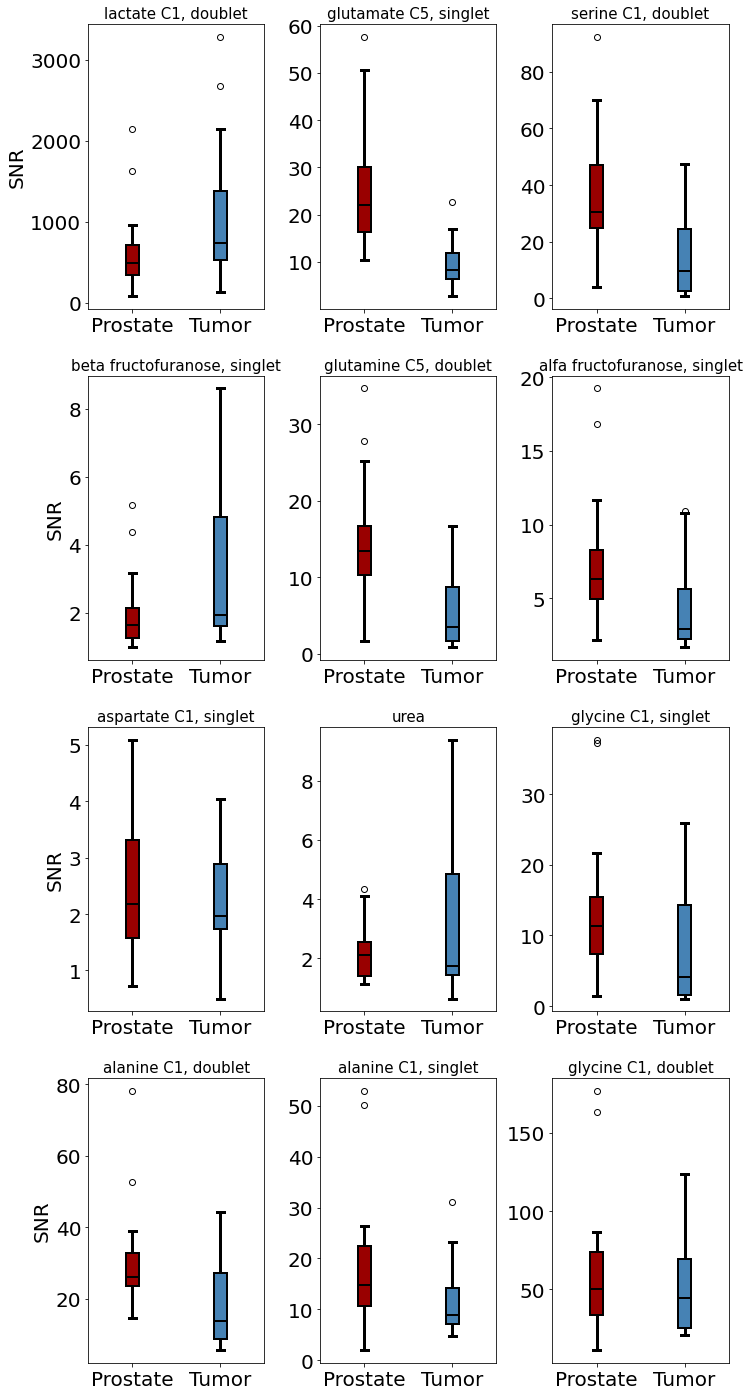

In [22]:
df = snr_12.copy()

#df = df.astype('float64')

df.columns = np.arange(12)

df['Tissue'] = md.Tissue[df.index].values


fig, axes = plt.subplots(nrows=4, ncols=3,sharey=False, constrained_layout=True, figsize = (10, 20))

bp_dict = df.boxplot(
by="Tissue", ax=axes.flatten()[:12],
return_type='both',
patch_artist = True, fontsize = 20, grid = False,
    boxprops = dict(linestyle='-', linewidth=2, color='k'),
    medianprops = dict(linestyle='-', linewidth=2, color='k'),
    #flierprops=dict(linestyle='-', linewidth=2, color = 'k'),
    whiskerprops=dict(linestyle='-', linewidth=3, color = 'k'),
    capprops=dict(linestyle='-', linewidth=3)
)

plt.tight_layout()
plt.suptitle('')

colors = "#990000","steelblue"
for row_key, (ax,row) in bp_dict.iteritems():
    ax.set_title(imps_met[row_key], fontsize = 15)
    if row_key in [0, 3, 6, 9]:
        ax.set_ylabel('SNR', fontsize = 20)
    ax.set_xlabel('')
    #ax.xticks(fontsize = 20)
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])

plt.show()

PCA using only 12 selected metabolite signals - loading and score plot.

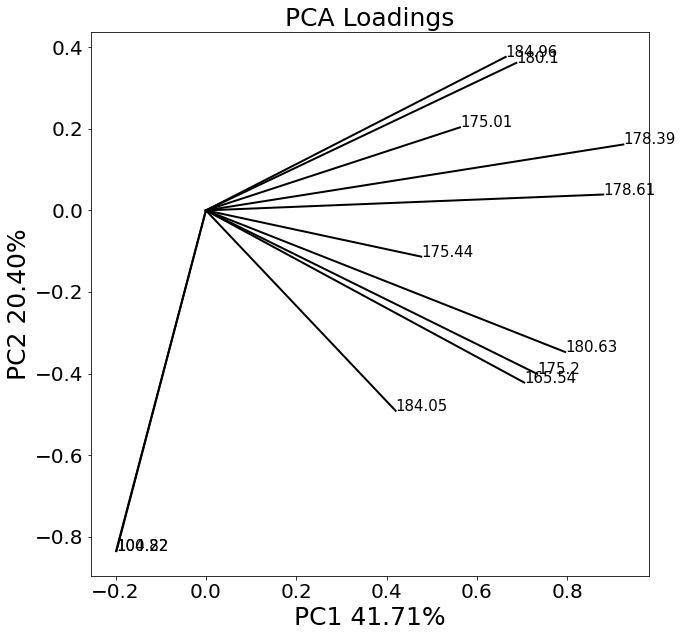

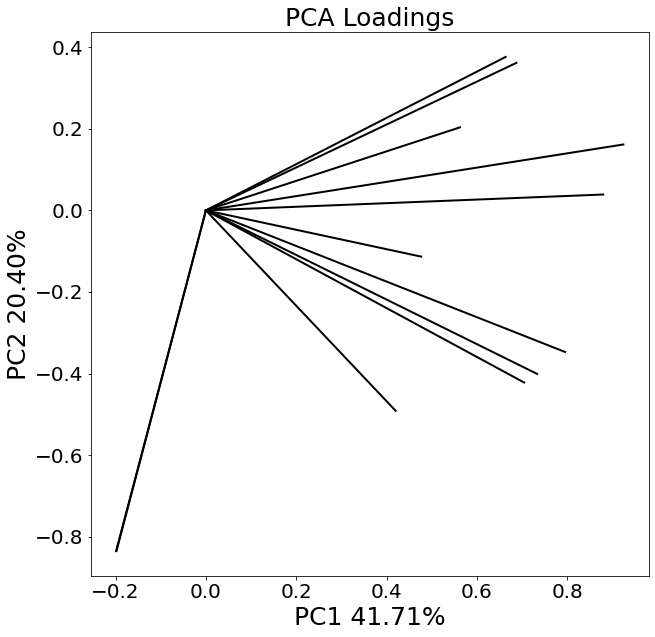

In [23]:
loadings_pca(met_interest, True,  scale = "s")
loadings_pca(met_interest,  scale = "s")

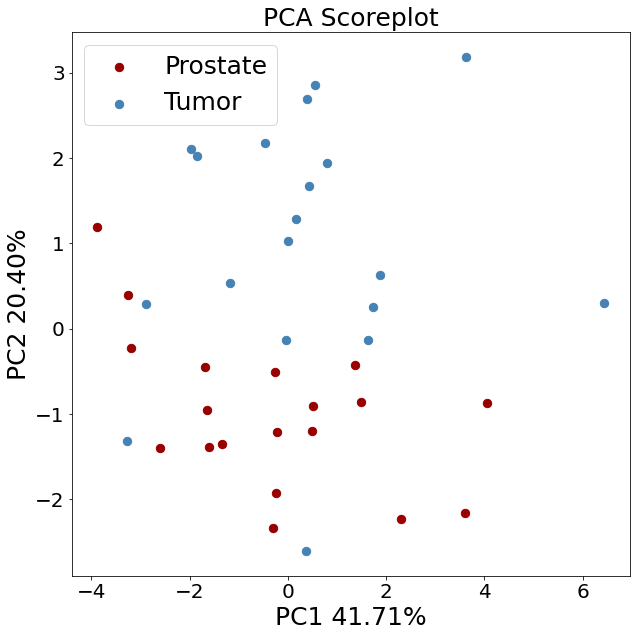

[41.71 20.4  19.73  7.63  3.46  2.53  1.67  1.07  0.98  0.45  0.33  0.04]


In [24]:
makepca(met_interest, md['Tissue'], 's')